# Map of Science

## GBI6-2021II: BIOINFORMÁTICA

**Villacres Nieto Bryan Anthony** 

**17-02-2022**

**Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE.** 
  
#### Se requiere dos adaptaciones para resolver esta actividad:
 
Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
 
Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  Ubicación Geográfica de Países - Google Developer. Así   
  
  como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.

**Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:**

 
En el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.
 
La figura tiene etiquetas adecuadas en los ejes de la visualización. 
  
Se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [12]:
#importar las librerias necesarias
import re
import csv
import pandas as pd
import matplotlib.pyplot as pltb
import itertools

In [40]:
#abrimos el archivo de pubmed
with open('pubmed-prostateca-set.txt',"r", encoding='utf-8-sig') as f:
    data = f.read()
#delimitamos con \n\s(para un espacio) {6} (con 6 repeticiones)     
data = re.sub(r'\n\s{6}',' ', data)
print(data[:3000])


PMID- 33085395
STAT- Publisher
CTDT- 20211001
PB  - StatPearls Publishing
DP  - 2022 Jan
TI  - Localized Prostate Cancer.
BTI - StatPearls
AB  - Prostate cancer is a disease of men. An estimated 1.2 million cases were diagnosed  in 2018, making it the second most commonly diagnosed cancer in men worldwide. It  was also the most common cancer in men aged over 55. In the same year, prostate  cancer was the 3rd most common cause of cancer-related death in men in North America  and Europe. From a global perspective, deaths from the liver, stomach, and  esophageal cancer meant that it ranked sixth for cancer-deaths internationally. The  prostate is a small glandular organ (typically 20-30g in the healthy adult male)  that is responsible for the production of the majority of seminal fluid. It lies  anterior to the rectum and encases the urethra between the bladder neck and the  external urethral sphincter. The ‘nervi erigentes’ (responsible for continence and  erectile function) course from 

In [41]:
paises = re.findall (r"\,\s[A-Z]+[A-z]{2,11}\.", data)
#se delimita otra vez con (r"\,\s[A-Z]+[A-z]{2,11}\." que nos dice que tomando una coma, un espacio que inicie con mayusculas de la A a la Z con otra mayuscula y una minuscula que tenga un rango de 2 a 11 
print (paises[:100])

[', USA.', ', USA.', ', Australia.', ', Australia.', ', Australia.', ', Australia.', ', Australia.', ', Basel.', ', Switzerland.', ', Switzerland.', ', Switzerland.', ', Switzerland.', ', Switzerland.', ', Switzerland.', ', Switzerland.', ', Switzerland.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Japan.', ', Japan.', ', Korea.', ', Korea.', ', Korea.', ', Australia.', ', Australia.', ', USA.', ', USA.', ', Argentina.', ', France.', ', France.', ', France.', ', Argentina.', ', China.', ', Iran.', ', Iran.', ', Iran.', ', Iran.', ', Iran.', ', Canada.', ', Canada.', ', Canada.', ', Canada.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Portugal.', ', Portugal.', ', Portugal.', ', Germany.', ', Portugal.', ', Portugal.', ', Connecticut.', ', Connecticut.', ', Connecticut.'

In [42]:
unique_text =list(set(paises))
#se tranforma en una lista
unique_text.sort()
#se ordena y se elimina los que se repiten 
unico = unique_text
print(unico)

[', Afula.', ', Alabama.', ', Algeria.', ', Amgen.', ', Argentina.', ', Arizona.', ', Astellas.', ', Augusta.', ', Australia.', ', Austria.', ', Azerbaijan.', ', BMS.', ', Bangladesh.', ', Barbados.', ', Barcelona.', ', Basel.', ', Belarus.', ', Belgium.', ', Berlin.', ', Beurhausstr.', ', Bldg.', ', Bologna.', ', Bordeaux.', ', Boston.', ', Brasil.', ', Braunschweig.', ', Brazil.', ', Bulgaria.', ', CABIMER.', ', California.', ', Canada.', ', Chicago.', ', Chile.', ', China.', ', Clin.', ', Colombia.', ', Colorado.', ', Connecticut.', ', Croatia.', ', Ctra.', ', Cuba.', ', Cyprus.', ', Czechia.', ', DENMARK.', ', Davis.', ', Denmark.', ', Deutschland.', ', Egypt.', ', Eire.', ', Fac.', ', Finland.', ', Fla.', ', Florida.', ', France.', ', Freiburgstr.', ', GSK.', ', Galveston.', ', Genoa.', ', Georgia.', ', Germany.', ', Ghana.', ', Greece.', ', Guatemala.', ', Haifa.', ', Hamburg.', ', Heidelberg.', ', Houston.', ', Hufelandstr.', ', Hungary.', ', Iceland.', ', Illinois.', ', Inc.', 

In [43]:
b = unique_text
#se eliman las caracteristicas que no son los que queremos 
b.remove(', Scotland.')
b.remove(', Seagen.')
b.remove(', Portugal.')
b.remove(', Oregon.')
b.remove(', Pennsylvania.')
b.remove(', Panama.')
b.remove(', Pakistan.')
b.remove(', Portland.')
b.remove(', Norderneystr.')
b.remove(', Novartis.')
b.remove(', Myriad.')
b.remove(', Ohio.')
b.remove(', Pierre.')
b.remove(', Palestine.')
b.remove(', ORIC.')
b.remove(', Ningxia.')
b.remove(', Oakland.')
b.remove(', NSW.')
b.remove(', Nauen.')
b.remove(', Nar.')
b.remove(', Oman.')
b.remove(', Ont.')
b.remove(', Ontario.')
b.remove(', Netherlands.')
b.remove(', Nigeria.')
b.remove(', Roche.')
b.remove(', Quebec.')
b.remove(', Romania.')
b.remove(', Rotterdam.')
b.remove(', Tanzania.')
b.remove(', Spain.')
b.remove(', Tenebio.')
b.remove(', Vietnam.')
b.remove(', Virginia.')
b.remove(', Stadenstr.')
b.remove(', Russia.')
b.remove(', Tolmar.')
b.remove(', SWEDEN.')
b.remove(', Tennessee.')
b.remove(', Sandoz.')
b.remove(', Stephanstr.')
b.remove(', Texas.')
b.remove(', Stockholm.')
b.remove(', Washington.')
b.remove(', Thailand.')
b.remove(', Stuttgart.')
b.remove(', Tokyo.')
b.remove(', Sanofi.')
b.remove(', Sudan.')
b.remove(', Ver.')
b.remove(', Prof.')
b.remove(', Seattle.')
b.remove(', Queensland.')
b.remove(', Singapore.')
b.remove(', Rennes.')
b.remove(', PSAD.')
b.remove(', Philippines.')
b.remove(', Qatar.')
b.remove(', Tampa.')
b.remove(', Slovakia.')
b.remove(', Milan.')
b.remove(', Minnesota.')
b.remove(', Mississippi.')
b.remove(', Missouri.')
b.remove(', Moorenstr.')
b.remove(', Morocco.')
b.remove(', Philadelphia.')
b.remove(', Poland.')
b.remove(', Slovenia.')
b.remove(', Merck.')
b.remove(', Mettmann.')
b.remove(', Mexico.')
b.remove(', Michigan.')
b.remove(', Raemistr.')
b.remove(', Switzerland.')
b.remove(', Senegal.')
b.remove(', Toronto.')
b.remove(', Uganda.')
b.remove(', Uruguay.')
b.remove(', Ukraine.')
b.remove(', Takeda.')
b.remove(', Tunisia.')
b.remove(', TKY.')
b.remove(', Utah.')
b.remove(', Verona.')
b.remove(', Taiwan.')
b.remove(', Sweden.')
b.remove(', Greece.')
b.remove(', Guatemala.')
b.remove(', Haifa.')
b.remove(', Hamburg.')
b.remove(', Heidelberg.')
b.remove(', Houston.')
b.remove(', Hufelandstr.')
b.remove(', Hungary.')
b.remove(', Iceland.')
b.remove(', Illinois.')
b.remove(', Inc.')
b.remove(', India.')
b.remove(', Indiana.')
b.remove(', Indonesia.')
b.remove(', Iran.')
b.remove(', Iraq.')
b.remove(', Ireland.')
b.remove(', Irvine.')
b.remove(', Israel.')
b.remove(', Istanbul.')
b.remove(', Italia.')
b.remove(', Italy.')
b.remove(', Izmir.')
b.remove(', Japan.')
b.remove(', Jordan.')
b.remove(', Kansas.')
b.remove(', Kazakhstan.')
b.remove(', Kentucky.')
b.remove(', Kiel.')
b.remove(', Kingswood.')
b.remove(', Korea.')
b.remove(', LLC.')
b.remove(', Laekna.')
b.remove(', Latvia.')
b.remove(', Lebanon.')
b.remove(', Leeds.')
b.remove(', Libya.')
b.remove(', Lilly.')
b.remove(', Lithuania.')
b.remove(', London.')
b.remove(', Louisiana.')
b.remove(', Madison.')
b.remove(', Ltd.')
b.remove(', Luxembourg.')
b.remove(', Sec.')
b.remove(', Malaysia.')
b.remove(', Martinique.')
b.remove(', Maryland.')
b.remove(', Kenya.')
b.remove(', Pfizer.')
b.remove(', Zurich.')
b.remove(', Wisconsin.')
b.remove(', Wedel.')
b.remove(', UAE.')
b.remove(', Turkey.')
b.remove(', Turin.')
b.remove(', TEVA.')
b.remove(', Serbia.')
b.remove(', Rendsburg.')
b.remove(', Alabama.')			
b.remove(', Algeria.')
b.remove(', Amgen.')
b.remove(', Arizona.')
b.remove(', Astellas.')
b.remove(', Afula.')
b.remove(', Austria.')
b.remove(', Azerbaijan.')
b.remove(', BMS.')
b.remove(', Bangladesh.')
b.remove(', Barbados.')
b.remove(', Barcelona.')
b.remove(', Basel.')
b.remove(', Belarus.')
b.remove(', Belgium.')
b.remove(', Berlin.')
b.remove(', Beurhausstr.')
b.remove(', Bldg.')
b.remove(', Bologna.')
b.remove(', Bordeaux.')
b.remove(', Boston.')
b.remove(', Braunschweig.')
b.remove(', Bulgaria.')
b.remove(', CABIMER.')
b.remove(', California.')
b.remove(', Chicago.')
b.remove(', Chile.')
b.remove(', Clin.')
b.remove(', Colombia.')
b.remove(', Colorado.')
b.remove(', Connecticut.')
b.remove(', Croatia.')
b.remove(', Ctra.')
b.remove(', Cuba.')
b.remove(', Cyprus.')
b.remove(', Czechia.')
b.remove(', Marseille.')
b.remove(', DENMARK.')
b.remove(', Davis.')
b.remove(', Denmark.')
b.remove(', Deutschland.')
b.remove(', Egypt.')
b.remove(', Eire.')
b.remove(', Fac.')
b.remove(', Fla.')
b.remove(', Florida.')
b.remove(', France.')
b.remove(', Freiburgstr.')
b.remove(', GSK.')
b.remove(', Galveston.')
b.remove(', Genoa.')
b.remove(', Georgia.')
b.remove(', Germany.')
b.remove(', Ghana.')
b.remove(', Augusta.')
b.remove(', Canada.')
b.remove(', Finland.')
b.remove(', Netherland.')
b.remove(', Argentina.')





In [44]:
    print() 
    print('Los paises de interes son: ', b)


Los paises de interes son:  [', Australia.', ', Brasil.', ', Brazil.', ', China.', ', Norway.', ', USA.']


In [29]:
    c = "".join(b)
    d = c.split(", ")
    e = "".join(d)
    f = e.split(".")
    f.remove("")
    u = f
    print()
    print('La lista final es: ', u)
    #se unen 


La lista final es:  ['Australia', 'Brasil', 'Brazil', 'China', 'Norway', 'USA']


In [30]:
datos = pd.read_csv('./Libro1.csv', engine='python', skipfooter=3)
datos.head(10)
#se importa el doc excel

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [31]:
name = datos[datos.name.isin(u)]
name.head(10)

,country,latitude,longitude,name
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
45,CN,35.861660,104.195397,China
163,NO,60.472024,8.468946,Norway


In [33]:
paises = datos[datos.country.isin(u)]
all_data =pd.concat([name,paises]).drop_duplicates().sort_values('name')
all_data.head(10)

,country,latitude,longitude,name
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
45,CN,35.861660,104.195397,China
163,NO,60.472024,8.468946,Norway


In [36]:
import matplotlib.pyplot as plt
#se importa las librerias necesarias

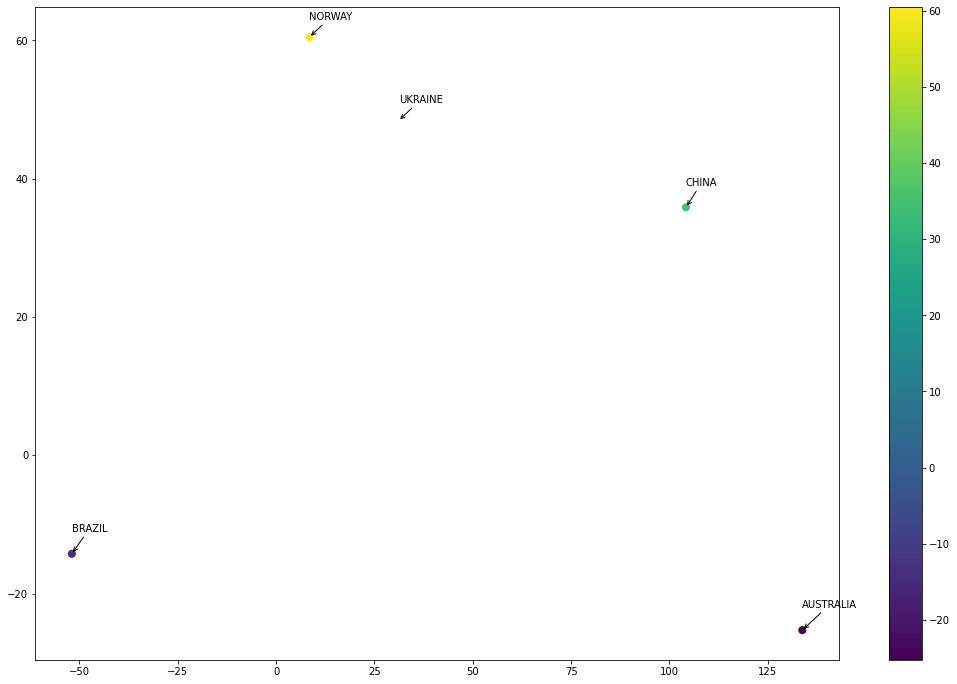

In [38]:
pltb.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)
pltb.colorbar()
ard = dict(arrowstyle="->")

plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)
#delimitamos las cordenadas del mapa 

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )